Use the Europe_Covid.txt file from the DATA 690 Data Files

**Exercise 1.** Compute the Jaccard similarity index

• Load ‘word_tokenize’ and ‘WordNetLemmatizer’ from nltk, among
other libraries

• Use these pairs for comparison:

o pair1 = ["What you do defines you","Your deeds define you"]

o pair2 = ["Once upon a time there lived a king.", "Who is your
queen?"]

o pair3 = ["He is desperate", "Is he not desperate?"]

• What is the Jaccard similarity index between pair1[0] and pair1[1]?

**Exercise 2**.  Compute the Levenshtein distance between "I cannot believe
what he said" and "I believe it is not what he said". What does the result
mean?

**Exercise 3.** Compute the most similar words to 'government' and 'curfew'
based on the text.

**Exercise 4**. What is the sentiment and subjectivity of the Europe_Covid
text?

**Exercise 5.** WordCloud
• What are the most frequently used words in the Europe_Covid text?

**Exercise 6.** Summarize the text in 5 sentences using extractive
summarization.

**Exercise 7.** Use a zero-shot transformer to determine the following
categories: informational, query, advocacy, not informational.

**EXERCISE 1**

In [35]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string


nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [36]:
with open("Europe_Covid.txt"  , 'r', encoding='utf-8') as file:
    text = file.read()

In [37]:
#pairs for comparison
pair1 = ["What you do defines you", "Your deeds define you"]
pair2 = ["Once upon a time there lived a king.", "Who is your queen?"]
pair3 = ["He is desperate", "Is he not desperate?"]


In [38]:
def jaccard_similarity(text1, text2):
    set1 = set(text1)
    set2 = set(text2)
    intersection = len(set1.intersection(set2))
    union = len(set1) + len(set2) - intersection
    return intersection / union


jaccard_index_pair1 = jaccard_similarity(pair1[0].split(), pair1[1].split())


print(f"Jaccard similarity index between pair1[0] and pair1[1]: {jaccard_index_pair1}")

Jaccard similarity index between pair1[0] and pair1[1]: 0.14285714285714285


**EXERCISE 2**

In [39]:
!pip install editdistance


In [40]:
import editdistance

line1 = "I cannot believe what he said"
line2 = "I believe it is not what he said"

distance = editdistance.eval(line1, line2)

print(f"Levenshtein distance: {distance}")


Levenshtein distance: 15


**EXERCISE 3**

In [41]:
!pip install gensim

In [42]:
from gensim.models import Word2Vec

In [43]:
tokenized_text = [word_tokenize(sentence.lower()) for sentence in nltk.sent_tokenize(text)]

#Word2Vec model
model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=1, workers=4)
#Finding similar words
government = model.wv.most_similar('government', topn=5)
curfew = model.wv.most_similar('curfew', topn=5)

# Print the results
print(f"Most similar words to 'government': {government}")
print(f"Most similar words to 'curfew': {curfew}")

Most similar words to 'government': [('next', 0.3014416992664337), ('class', 0.26634857058525085), ('also', 0.25059938430786133), ('well', 0.23926809430122375), ('estimates', 0.2361537665128708)]
Most similar words to 'curfew': [('but', 0.2296932488679886), ('beginning', 0.2276214212179184), ('nations', 0.22718878090381622), ('officially', 0.20626649260520935), ('infections', 0.205727681517601)]


**EXERCISE 4**

In [44]:
from textblob import TextBlob

In [45]:
blob = TextBlob(text)
polarity = blob.sentiment.polarity
subjectivity = blob.sentiment.subjectivity
print(f"Sentiment Polarity: {polarity}")
print(f"Subjectivity: {subjectivity}")

Sentiment Polarity: 0.04992382294707877
Subjectivity: 0.3476432095036746


**EXERCISE 5**

In [46]:
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [55]:
from nltk.corpus import stopwords
from nltk.probability import FreqDist

def preprocess_text(text):

    text = text.lower()
    text = text.translate(str.maketrans("", "", string.punctuation))
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words("english"))
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words and token not in ['on', 'or', 'and', 'soon']]

    return tokens
tokens = preprocess_text(text)

#To obtain word frequencies
fdist = FreqDist(tokens)

#10 most common words and corresponding frequencies
print("Top 10 most frequent words:")
print(fdist.most_common(10))


Top 10 most frequent words:
[('country', 7), ('case', 6), ('friday', 5), ('said', 5), ('new', 5), ('million', 4), ('number', 3), ('covid19', 3), ('europe', 3), ('president', 3)]


In [53]:
!pip install wordcloud


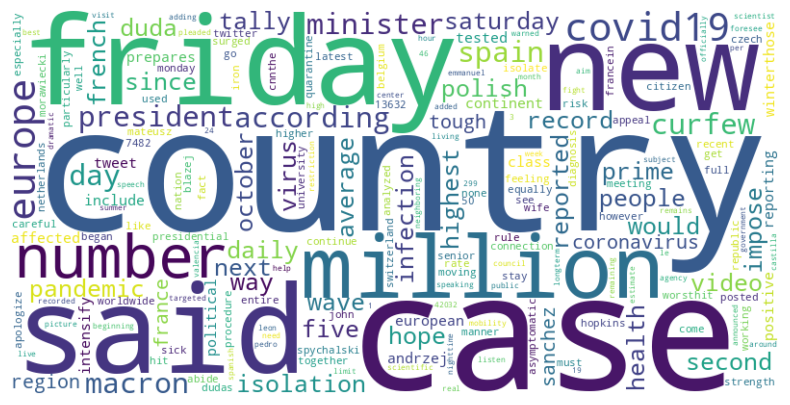

In [56]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(fdist)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


**EXERCISE 6**

In [48]:
!pip install bert-extractive-summarizer


In [49]:
from summarizer import Summarizer
summarizer = Summarizer()

doc = summarizer(text, num_sentences=5)

print(doc)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


European countries are reporting record numbers of Covid-19 cases as the continent prepares for the pandemic to intensify through winter. However, the fact is that I must isolate. I would like to apologize to all of those, who have to go through quarantine procedures in connection to meeting with me in recent days ... I hope none of you get sick." The Polish President used the video to appeal to people to be especially careful of senior citizens, as they were particularly at risk from Covid-19. Duda's diagnosis comes as the country reported 13,632 new cases Friday, the highest daily tally since the pandemic began.


**EXERCISE 7**

In [50]:
!pip install transformers


In [51]:
from transformers import pipeline

with open("Europe_Covid.txt"  , 'r', encoding='utf-8') as file:
    text = file.read()

#labels for classification
categories = ["informational", "query", "advocacy", "not informational"]

# zero-shot classification pipeline
classifier = pipeline("zero-shot-classification")
result = classifier(text, categories)
output = {

    'labels': result['labels'],
    'scores': result['scores']
}
print(output)


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


{'labels': ['advocacy', 'query', 'informational', 'not informational'], 'scores': [0.36089250445365906, 0.35187429189682007, 0.25070592761039734, 0.036527328193187714]}
